# Logistic Regression

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from logistic_regression import MultinomialLogisticRegression
from preprocess import Preprocess
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

## Loading data

In [3]:
raw_train_data = "../data/train.csv"
raw_test_data = "../data/test.csv"

In [4]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])
np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_data, test_size=0.33#, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'PS*PSL', 'T200*T500', 'TREFHT*T200', 'TREFHT*T500', 'U850*UBOT',
       'V850*VBOT', 'Z200*Z1000', 'ZBOT*Z1000', 'ZBOT*Z200', 'V850*U850',
       'UBOT*VBOT', 'month', 'Label'],
      dtype='object')


## Grid search

In [ ]:
regularizers = np.array([0.001,0.01,0.05,0.1])
learning_rates = np.array([0.001,0.01])

params_combination = np.array(
    np.meshgrid(regularizers, learning_rates)
).T.reshape(-1, 2)

valid_errors = []
valid_errors_idx = []

for reg, l_rate in params_combination:
    model = MultinomialLogisticRegression(learning_rate=l_rate, num_iterations=1000, regularizer=reg)
    model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)
    
    min_error_idx = np.argmin(model.valid_errors)
    valid_errors_idx.append(min_error_idx)
    
    min_error = np.min(model.valid_errors)
    valid_errors.append(min_error)

In [20]:
(valid_errors)

[0.9967435009861294,
 0.8178738838911292,
 0.9969944606524058,
 0.820457410705028,
 0.9981098369469674,
 0.831939752100134,
 0.9995040573151694,
 0.8462926788440163]

In [21]:
valid_errors_idx

[99, 99, 99, 99, 99, 99, 99, 99]

In [22]:
params_combination

array([[0.001, 0.001],
       [0.001, 0.01 ],
       [0.01 , 0.001],
       [0.01 , 0.01 ],
       [0.05 , 0.001],
       [0.05 , 0.01 ],
       [0.1  , 0.001],
       [0.1  , 0.01 ]])

In [53]:
model = MultinomialLogisticRegression(learning_rate=0.001, num_iterations=1000, regularizer=0.01)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 1.056854431633615
Epoch 200, cross entropy loss: 1.0301214529640212
Epoch 300, cross entropy loss: 1.0111319398878729
Epoch 400, cross entropy loss: 0.9966877256690968
Epoch 500, cross entropy loss: 0.9852301732760498
Epoch 600, cross entropy loss: 0.9759110419457141
Epoch 700, cross entropy loss: 0.9682185844558615
Epoch 800, cross entropy loss: 0.9618156831292978
Epoch 900, cross entropy loss: 0.9564642311423223
Index(['lat', 'U850', 'U850*UBOT', 'V850*VBOT', 'UBOT', 'UBOT*VBOT', 'TS',
       'TMQ', 'V850*U850', 'PSL', 'PS*PSL', 'PS', 'TREFHT', 'month', 'PRECT',
       'ZBOT', 'VBOT', 'ZBOT*Z200', 'TREFHT*T500', 'TREFHT*T200', 'Z200',
       'ZBOT*Z1000', 'Z1000', 'Z200*Z1000', 'lon', 'T500', 'QREFHT', 'V850',
       'T200*T500', 'Label'],
      dtype='object')
Confusion Matrix:
[[8012 1879 1738]
 [ 132  439    7]
 [ 894  450 1220]] 

Accuracy:
0.6547 

Precision:
0.4855 

Recall:
0.6414 

F1 Score:
0.5527

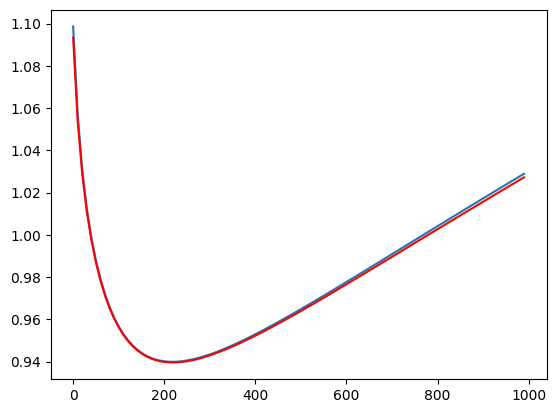

In [7]:
plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors,
    color='r'
)

Interesting, the error increases a lot.

In [8]:
model = MultinomialLogisticRegression(learning_rate=0.01, num_iterations=210, regularizer=0.01)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.9566936976549321
Epoch 200, cross entropy loss: 0.9401392613200452
Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'PS*PSL', 'T200*T500', 'TREFHT*T200', 'TREFHT*T500', 'U850*UBOT',
       'V850*VBOT', 'Z200*Z1000', 'ZBOT*Z1000', 'ZBOT*Z200', 'V850*U850',
       'UBOT*VBOT', 'month', 'Label'],
      dtype='object')
Confusion Matrix:
[[7877 2202 1504]
 [ 127  481    5]
 [ 760  562 1253]] 

Accuracy:
0.6507 

Precision:
0.5002 

Recall:
0.6504 

F1 Score:
0.5655


In [33]:
weights = pd.DataFrame(model.weights, index=['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'PS*PSL', 'T200*T500', 'TREFHT*T200', 'TREFHT*T500', 'U850*UBOT',
       'V850*VBOT', 'Z200*Z1000', 'ZBOT*Z1000', 'ZBOT*Z200', 'V850*U850',
       'UBOT*VBOT', 'month'], columns=[0,1,2])
weights

,0,1,2
lat,0.138196,0.008668,-0.146864
lon,0.014038,0.017715,-0.031753
TMQ,-0.053261,0.034667,0.018594
U850,-0.115974,-0.009377,0.125351
V850,0.005831,0.023609,-0.029440
UBOT,-0.077447,0.006663,0.070783
VBOT,-0.029001,0.018373,0.010628
QREFHT,0.007539,0.011913,-0.019452
PS,0.036074,-0.028987,-0.007086
PSL,0.036748,-0.029245,-0.007503


In [40]:
weights.abs().sort_values(by=[0,1,2], ascending=False).index[:-1]

Index(['lat', 'U850', 'U850*UBOT', 'V850*VBOT', 'UBOT', 'UBOT*VBOT', 'TS',
       'TMQ', 'V850*U850', 'PSL', 'PS*PSL', 'PS', 'TREFHT', 'month', 'PRECT',
       'ZBOT', 'VBOT', 'ZBOT*Z200', 'TREFHT*T500', 'TREFHT*T200', 'Z200',
       'ZBOT*Z1000', 'Z1000', 'Z200*Z1000', 'lon', 'T500', 'QREFHT', 'V850',
       'T200*T500'],
      dtype='object')

In [47]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])
np.random.shuffle(train_data)

collist = list(weights.abs().sort_values(by=[0,1,2], ascending=False).index[:-1]) + ["Label"]

train_df = train_df[collist]

X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=0.33#, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

Index(['lat', 'U850', 'U850*UBOT', 'V850*VBOT', 'UBOT', 'UBOT*VBOT', 'TS',
       'TMQ', 'V850*U850', 'PSL', 'PS*PSL', 'PS', 'TREFHT', 'month', 'PRECT',
       'ZBOT', 'VBOT', 'ZBOT*Z200', 'TREFHT*T500', 'TREFHT*T200', 'Z200',
       'ZBOT*Z1000', 'Z1000', 'Z200*Z1000', 'lon', 'T500', 'QREFHT', 'V850',
       'T200*T500', 'Label'],
      dtype='object')


In [50]:



    model = MultinomialLogisticRegression(learning_rate=0.01, num_iterations=500, regularizer=0.01)
    model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

    # Make predictions.
    predictions = model.predict(X_valid)
    print(train_df.columns)

    model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.951679193334503
Epoch 200, cross entropy loss: 0.934627521076061
Epoch 300, cross entropy loss: 0.9393923072159662
Epoch 400, cross entropy loss: 0.951235406772387
Index(['lat', 'U850', 'U850*UBOT', 'V850*VBOT', 'UBOT', 'UBOT*VBOT', 'TS',
       'TMQ', 'V850*U850', 'PSL', 'PS*PSL', 'PS', 'TREFHT', 'month', 'PRECT',
       'ZBOT', 'VBOT', 'ZBOT*Z200', 'TREFHT*T500', 'TREFHT*T200', 'Z200',
       'ZBOT*Z1000', 'Z1000', 'Z200*Z1000', 'lon', 'T500', 'QREFHT', 'V850',
       'T200*T500', 'Label'],
      dtype='object')
Confusion Matrix:
[[6781 3252 1596]
 [  75  496    7]
 [ 512  625 1427]] 

Accuracy:
0.5893 

Precision:
0.5016 

Recall:
0.6659 

F1 Score:
0.5722


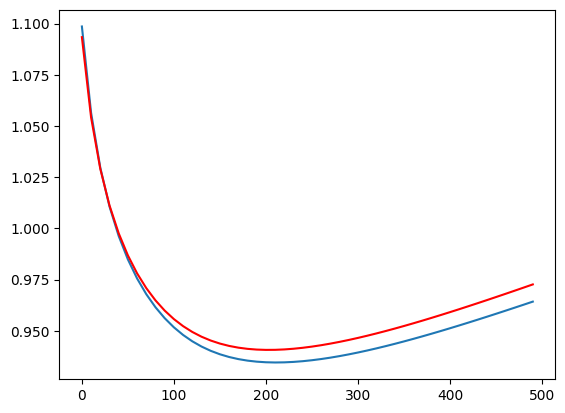

In [52]:
plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors,
    color='r'
)